In [1]:
%matplotlib inline
import h5py
import pandas as pd
import numpy as np
import helper_functions as hf
import matplotlib.pyplot as plt
from scipy.misc import imread
from collections import Counter
from tqdm import tqdm
import time
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pickledb

In [2]:
import sys
sys.path.append("/media/data_cifs/image_datasets/coco_2014/PythonAPI")
from pycocotools.coco import COCO
train_coco=COCO("/media/data_cifs/image_datasets/coco_2014/coco_images/annotations/instances_train2014.json")
val_coco=COCO("/media/data_cifs/image_datasets/coco_2014/coco_images/annotations/instances_val2014.json")

path = "/media/data_cifs/image_datasets/coco_2014/coco_images"
ilsvrc_coco_overlap_categories = np.load("{}/ilsvrc_coco_overlap_categories.npy".format(path))
overlaps = set([int(c[2]) for c in ilsvrc_coco_overlap_categories])

loading annotations into memory...
Done (t=20.47s)
creating index...
index created!
loading annotations into memory...
Done (t=14.07s)
creating index...
index created!


In [4]:
f = h5py.File("/media/data_cifs/danshiebler/data/img_ID_to_DATA.h5py")


sports skateboard
person person


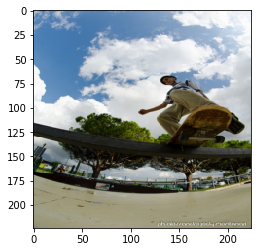

In [26]:
ind = 50040
img = f['train_keys'][ind]
ann_ids = train_coco.getAnnIds(imgIds=[img])
annotations= train_coco.loadAnns(ann_ids)
category_ids = list(set([a['category_id'] for a in annotations]))
cats = train_coco.loadCats(ids=category_ids)
for c in cats:
    print c['supercategory'], c["name"]
plt.imshow(f['train_data'][ind])

In [ ]:

for kind, coco in [('train', train_coco), ('val', val_coco)]:

    img_to_labels = {}

    for img in tqdm(coco.imgs.keys()):
        ann_ids = coco.getAnnIds(imgIds=[img])
        annotations = coco.loadAnns(ann_ids)
        annotation_ids = list(set([a['category_id'] for a in annotations]))
        img_to_labels[img] = annotation_ids
        cats = coco.loadCats(ids=annotation_ids)
        id_to_name = {c["id"]:c["name"] for c in cats}
        f_annotation_id_names = [(ID, id_to_name[ID]) for ID in annotation_ids if id_to_name[ID] in overlap_names]

In [ ]:
f = h5py.File("/media/data_cifs/danshiebler/data/img_ID_to_DATA.h5py")
f.keys()

In [23]:



path = "/media/data_cifs/image_datasets/coco_2014/coco_images"
ilsvrc_coco_overlap_categories = np.load("{}/ilsvrc_coco_overlap_categories.npy".format(path))
overlaps = set([int(c[2]) for c in ilsvrc_coco_overlap_categories])

for kind, coco in [('train', train_coco), ('val', val_coco)]:

    img_to_labels = {}
    overlap_names = set([k[0] for k in ilsvrc_coco_overlap_categories])
    overlap_ids = []
    for img in tqdm(coco.imgs.keys()):
        ann_ids = coco.getAnnIds(imgIds=[img])
        annotations = coco.loadAnns(ann_ids)
        annotation_ids = list(set([a['category_id'] for a in annotations]))
        img_to_labels[img] = annotation_ids
        cats = coco.loadCats(ids=annotation_ids)
        id_to_name = {c["id"]:c["name"] for c in cats}
        f_annotation_id_names = [(ID, id_to_name[ID]) for ID in annotation_ids if id_to_name[ID] in overlap_names]
        if len(f_annotation_id_names):
        	overlap_ids.append(img)

    print len(coco.imgs.keys()), len(img_to_labels), len(overlap_ids)

    np.save("data/{}_img_IDs.npy".format(kind), coco.imgs.keys())
    np.save("data/{}_overlap_img_IDs.npy".format(kind), overlap_ids)
    np.save("data/{}_img_ID_to_LABELS.npy".format(kind), img_to_labels)






  0%|          | 0/82783 [00:00<?, ?it/s]


  3%|▎         | 2435/82783 [00:00<00:03, 24341.96it/s]


  8%|▊         | 6451/82783 [00:00<00:02, 27602.83it/s]


 15%|█▍        | 12134/82783 [00:00<00:02, 32638.50it/s]


 21%|██        | 17176/82783 [00:00<00:01, 36500.15it/s]


 27%|██▋       | 22195/82783 [00:00<00:01, 39752.69it/s]


 33%|███▎      | 27240/82783 [00:00<00:01, 42451.27it/s]


 39%|███▉      | 32285/82783 [00:00<00:01, 44567.96it/s]


 46%|████▌     | 37682/82783 [00:00<00:00, 47025.15it/s]


 53%|█████▎    | 43462/82783 [00:00<00:00, 49809.01it/s]


 59%|█████▊    | 48548/82783 [00:01<00:00, 49593.37it/s]


 65%|██████▍   | 53581/82783 [00:01<00:00, 49510.61it/s]


 71%|███████   | 58584/82783 [00:01<00:00, 48866.47it/s]


 77%|███████▋  | 63509/82783 [00:01<00:00, 45270.81it/s]


 82%|████████▏ | 68116/82783 [00:01<00:00, 43147.89it/s]


 89%|████████▉ | 73631/82783 [00:01<00:00, 46159.97it/s]


 96%|█████████▌| 79486/82783 [00:01<00:00, 49283.46it/s]


100%|██████

82783 82783 62342





 10%|▉         | 3889/40504 [00:00<00:00, 38887.63it/s]


 19%|█▉        | 7848/40504 [00:00<00:00, 39095.03it/s]


 33%|███▎      | 13239/40504 [00:00<00:00, 42602.37it/s]


 47%|████▋     | 19195/40504 [00:00<00:00, 46579.65it/s]


 61%|██████    | 24595/40504 [00:00<00:00, 48582.02it/s]


 74%|███████▎  | 29777/40504 [00:00<00:00, 49507.69it/s]


 86%|████████▌ | 34852/40504 [00:00<00:00, 49870.57it/s]


 99%|█████████▊| 39916/40504 [00:00<00:00, 50096.71it/s]


100%|██████████| 40504/40504 [00:00<00:00, 49839.84it/s]

40504 40504 30525


In [18]:
from scipy.misc import imread, imresize
import urllib2

for kind, coco in [('train', train_coco), ('val', val_coco)]:
    IDS = np.load("data/{}_img_IDs.npy".format(kind))
    img_objs = coco.loadImgs(ids=list(IDS))

    ID_to_img = {}
    for img_obj in tqdm(img_objs):
        f = urllib2.urlopen(img_obj['flickr_url'])
        img = imread(f)
        img = imresize(img, (224,224,3))
        if len(img.shape) == 2:
            img = np.dstack((img, img, img))
        assert len(img.shape) == 3
        assert img.shape[2] == 3
        ID_to_img[img_obj['id']] = img

    np.save("data/{}_img_ID_to_DATA.npy", ID_to_img)


# loaded_data = {f:imread("{}/{}".format(path, f))[None,...] for f in tqdm(data_files)}
# resized_data = {f:imresize(loaded_data[f][0], (224,224,3)) for f in loaded_data}




  0%|          | 0/82783 [00:00<?, ?it/s]

  0%|          | 1/82783 [00:00<4:36:30,  4.99it/s]

  0%|          | 2/82783 [00:00<4:08:19,  5.56it/s]

  0%|          | 3/82783 [00:00<3:43:54,  6.16it/s]

  0%|          | 4/82783 [00:00<3:44:40,  6.14it/s]

  0%|          | 5/82783 [00:00<3:54:17,  5.89it/s]

  0%|          | 6/82783 [00:00<3:34:19,  6.44it/s]

  0%|          | 7/82783 [00:01<3:28:47,  6.61it/s]

  0%|          | 8/82783 [00:01<3:30:37,  6.55it/s]

  0%|          | 9/82783 [00:01<3:36:39,  6.37it/s]

  0%|          | 10/82783 [00:01<6:08:09,  3.75it/s]

  0%|          | 11/82783 [00:02<6:04:47,  3.78it/s]

  0%|          | 12/82783 [00:02<6:28:32,  3.55it/s]

  0%|          | 13/82783 [00:02<6:47:14,  3.39it/s]

  0%|          | 14/82783 [00:03<7:03:25,  3.26it/s]

  0%|          | 15/82783 [00:03<7:04:13,  3.25it/s]

  0%|          | 16/82783 [00:03<6:42:54,  3.42it/s]

  0%|          | 17/82783 [00:03<6:31:00,  3.53it/s]


  0%|          | 18/82783 [00:04<5:58:09,  3.

KeyboardInterrupt: 

In [ ]:
L = !ls /media/data_cifs/image_datasets/coco_2014/coco_images/ilsvrc12_val_overlap
num = '339'
overlap_num = [l.split("_")[0] + l.split("_")[1].split(".")[0] for l in L  if l.split("_")[0] == num]
train_num = set([str(k) for k in train_coco.imgs.keys() if str(k)[:3] == num])
val_num = set([str(k) for k in val_coco.imgs.keys() if str(k)[:3] == num])
IN = [k for k in overlap_num if (k in train_num or k in val_num)]
OUT = [k for k in overlap_num if not (k in train_num or k in val_num)]
len(IN), len(OUT)

In [ ]:
ilsvrc_overlap = pd.read_csv("{}/ilsvrc_overlap.csv".format(path))
ilsvrc_coco_overlap_categories = np.load("{}/ilsvrc_coco_overlap_categories.npy".format(path))
coco_full_im_processed_labels = np.load("{}/coco_full_im_processed_labels.npz".format(path))

In [ ]:
ilsvrc_coco_overlap_categories

In [ ]:
features_db = pickledb.load('databases/signature_to_saved_data_path.db', True)
model_results_db = pickledb.load('databases/signature_to_linear_model_results.db', True)
for k in features_db.getall():
    if model_results_db.get(k):
        print k
        print features_db.get(k)['saved_data_path']
        print model_results_db.get(k)["accuracy"]
        print 

In [ ]:

label_inds, label_onehots, data_files = hf.get_files_labels(load_small=False)
file_to_labels = dict(zip(data_files, label_inds))
print "loading..."
file_to_features = np.load("data/1500173639.npy").item()
print "loaded!"

X = np.vstack([v for v in file_to_features.values()])
y = np.array([file_to_labels[k] for k in file_to_features.keys()])

indices = np.random.permutation(np.arange(X.shape[0]))
train, test = indices[:int(0.75*len(indices))], indices[int(0.75*len(indices)):]


In [ ]:

clf = LogisticRegression(solver='sag', multi_class="multinomial", verbose=1000, n_jobs=16)
# clf = LinearSVC(dual=False, verbose = 1000)


scalar = StandardScaler()
pipeline = Pipeline([("pp", scalar), ("clf", clf)])

start = time.time()
print "training..."
pipeline.fit(X[train], y[train])
print "trained in {}!".format(time.time() - start)

predictions = pipeline.predict(X[test])
print accuracy_score(y[test], predictions)
print classification_report(y[test], predictions)
